### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Simple Data for Simple Linear Regression

In [5]:
# Independent variable
x = np.array([210,290,250,500,310,430,455,380,535,510])
# Dependent variable
y = np.array([5,7,6,13,8,11,12,10,15,14])


### Plot Data

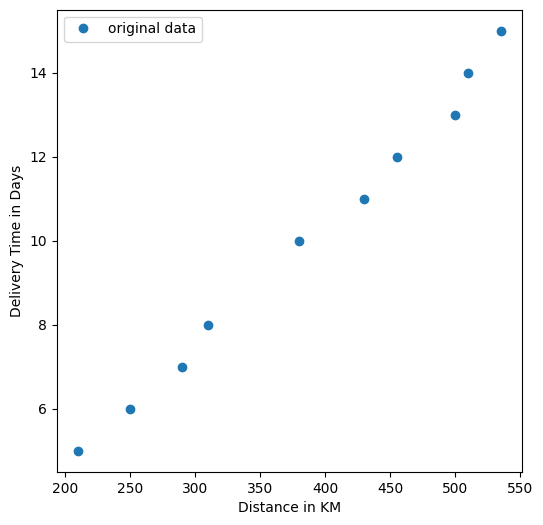

In [6]:
#Plot the data along
plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'o', label='original data')
plt.xlabel('Distance in KM') # X axis data label
plt.ylabel('Delivery Time in Days') # Y axis data label
plt.legend()
plt.show()

In [8]:
# Means of indep and dep variables
xbar = np.mean(x)
ybar = np.mean(y)
# Apply equations to find b and a
b = np.sum((x - xbar)*(y - ybar)) / np.sum((x - xbar)**2)
a = ybar - b * xbar
# Plug in the values of the dep variable into the line equation to obtain yhat
yhat = a + b * x

# Compute the error (i.e. residuals)
error = y - yhat

# Compute metrics
SE = error**2 # squared error
MSE = np.mean(SE) # mean squared error
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE

SST = np.sum((y - ybar)**2)
SSR = np.sum((yhat - ybar)**2)
Rsquared = SSR/SST
print('RMSE =',RMSE)
print('Rsquared =',Rsquared)
# This should give you the same result for Rsquared
#Rsquared = 1.0 - (np.var(error) / np.var(y))

RMSE = 0.2826568151739089
Rsquared = 0.9926634641722439


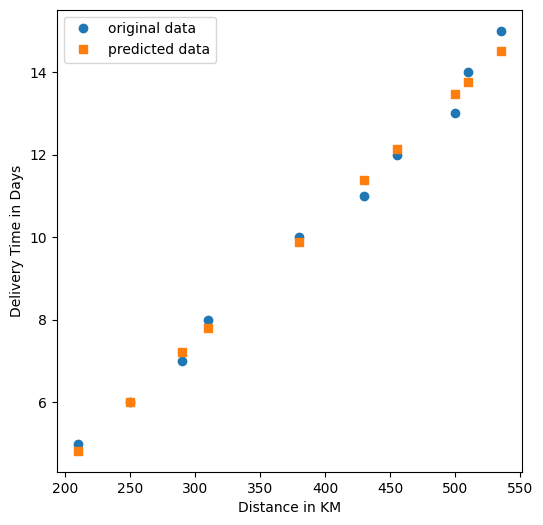

In [9]:
#Plot the data along with the fitted line:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, yhat, 's', label='predicted data')
plt.xlabel('Distance in KM') # X axis data label
plt.ylabel('Delivery Time in Days') # Y axis data label
plt.legend()
plt.show()

### Plot original points, fitted line and residuals

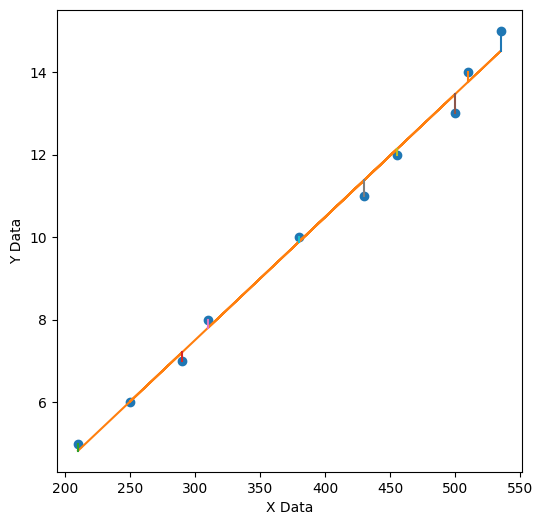

In [10]:
f = plt.figure(figsize=(6,6), dpi=100)
axes = f.add_subplot(111)

# first the raw data as a scatter plot
axes.plot(x, y,  'o')

# now the model as a line plot
axes.plot(x, yhat)

# now add individual line for each point
for i in range(len(x)):
    lineXdata = (x[i], x[i]) # same X
    lineYdata = (y[i], yhat[i]) # different Y
    plt.plot(lineXdata, lineYdata)

axes.set_xlabel('X Data') # X axis data label
axes.set_ylabel('Y Data') # Y axis data label

plt.show()

### Use existing package to fit model and confirm results

In [12]:
# function to apply simple linear regression
def func(x, b, a):
    return a + b*x

# curve fit the data
fitted_params, pcov = curve_fit(func, x, y)

model_predictions = func(x, *fitted_params) 

absError = model_predictions - y

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(y))
print('RMSE =', RMSE)
print('Rsquared=', Rsquared)

# Confirm results are the same like the manual calculations

RMSE = 0.28265681517390906
Rsquared= 0.9926634641722445


### Use another existing package to fit model and confirm results

slope: 0.029796    intercept: -1.431176
p-value:  3.9725624019989086e-10
Rsquared: 0.992663


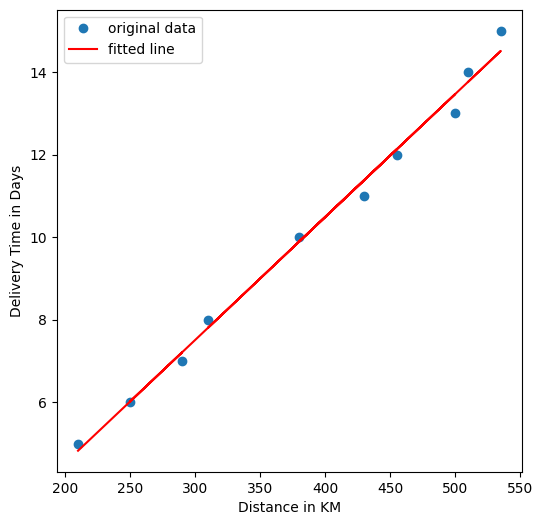

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("p-value: ", p_value/2) # one-sided p-value
#To get coefficient of determination (R-squared):
print("Rsquared: %f" % r_value**2)


#Plot the data along with the fitted line:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('Distance in KM') # X axis data label
plt.ylabel('Delivery Time in Days') # Y axis data label
plt.legend()
plt.show()

## Multiple Linear Regression

1. We would like to investigate the pasture rent structure with respect to the grass variety over
   various districts in Minnesota. The data set “pasture-data.csv” provides 67 rows of data.
2. The data columns include:
    - I, index
    - X1, the rent per arable acre (dollars)
    - X2, the number of milk cows per square mile
    - X3, the difference between pasturage and arable land
    - Y, the rental price per acre for this variety of grass (dollars)
3. We seek a model of the form:
      Y = B0 + B1 * X1 + B2 * X2 + B3 * X3

In [20]:
# load the data
data = pd.read_csv("pasture-data.csv")

In [21]:
data.head()

,I,X1,X2,X3,Y
0,1,15.50,17.25,0.24,18.38
1,2,22.29,18.51,0.20,20.00
2,3,12.36,11.13,0.12,11.50
3,4,31.84,5.54,0.12,25.00
4,5,83.90,5.44,0.04,62.50


In [22]:
# get x data .. only features, no index and outcome variables
X = data.iloc[:,1:-1]

# this is the outcome variable
y = data.iloc[:,-1]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Compute residuals
residuals = (y_test - y_pred)


### Plot residuals 

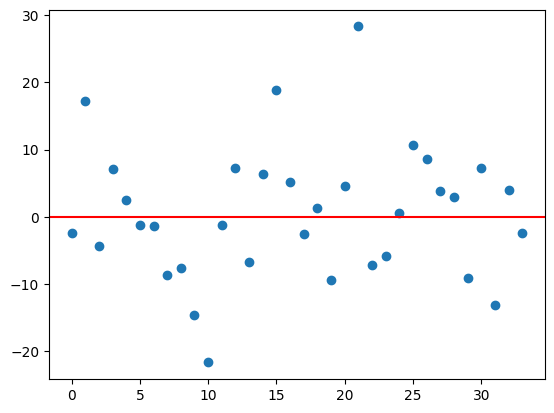

In [23]:
# Plot residuals
plt.scatter(range(len(residuals)),residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

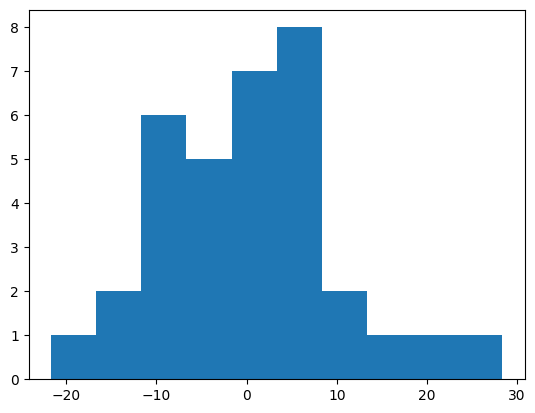

In [24]:
# Plot residuals
plt.hist(residuals)
plt.show()

### Obtain details of significance tests and CIs

In [25]:
mod = sm.OLS(y,X)
model = mod.fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.966   
Dependent Variable:     Y                AIC:                         486.0090
Date:                   2025-12-22 22:56 BIC:                         492.6231
No. Observations:       67               Log-Likelihood:              -240.00 
Df Model:               3                F-statistic:                 631.7   
Df Residuals:           64               Prob (F-statistic):          1.80e-47
R-squared (uncentered): 0.967            Scale:                       79.221  
-----------------------------------------------------------------------------------
          Coef.        Std.Err.         t         P>|t|        [0.025        0.975]
-----------------------------------------------------------------------------------
X1         0.8349        0.0333      25.0660      0.0000        0.7684       0.9014
X2         0.4648        0.0912       5.0940      0.0000        0.2825       0.6471
X3       -19.5200        8.5094      -2.2939      0.0251      -36.5194      -2.5205
------------------------------------------------------------------------------
Omnibus:                   7.916            Durbin-Watson:               2.288
Prob(Omnibus):             0.019            Jarque-Bera (JB):            7.601
Skew:                      0.635            Prob(JB):                    0.022
Kurtosis:                  4.053            Condition No.:               411  
==============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""